https://www.kaggle.com/osmi/mental-health-in-tech-survey



# Q: Subgroups of employes with MH issues? (volnurability)

# Q: Prejudice Against MH issues @ work? 

# Q: MH support shemes in Companies?



In [485]:
import numpy as np
import pandas as pd 

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure


In [498]:
ds = pd.read_csv('survey.csv')
ds.head(10)

ds['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [487]:
ds

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1254,2015-09-12 11:17:21,26,male,United Kingdom,NaN,No,No,Yes,NaN,26-100,...,Somewhat easy,No,No,Some of them,Some of them,No,No,Don't know,No,NaN
1255,2015-09-26 01:07:35,32,Male,United States,IL,No,Yes,Yes,Often,26-100,...,Somewhat difficult,No,No,Some of them,Yes,No,No,Yes,No,NaN
1256,2015-11-07 12:36:58,34,male,United States,CA,No,Yes,Yes,Sometimes,More than 1000,...,Somewhat difficult,Yes,Yes,No,No,No,No,No,No,NaN
1257,2015-11-30 21:25:06,46,f,United States,NC,No,No,No,NaN,100-500,...,Don't know,Yes,No,No,No,No,No,No,No,NaN


In [488]:
### Se the type of each collumn


ds.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [489]:
### Check the size of table 

ds.shape

(1259, 27)

In [490]:
### See all columns 

ds.columns



Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [53]:
info = {col : ds[col].unique() for col in ds.columns}
info

{'Timestamp': array(['2014-08-27 11:29:31', '2014-08-27 11:29:37',
        '2014-08-27 11:29:44', ..., '2015-11-07 12:36:58',
        '2015-11-30 21:25:06', '2016-02-01 23:04:31'], dtype=object),
 'Age': array([         37,          44,          32,          31,          33,
                 35,          39,          42,          23,          29,
                 36,          27,          46,          41,          34,
                 30,          40,          38,          50,          24,
                 18,          28,          26,          22,          19,
                 25,          45,          21,         -29,          43,
                 56,          60,          54,         329,          55,
        99999999999,          48,          20,          57,          58,
                 47,          62,          51,          65,          49,
              -1726,           5,          53,          61,           8,
                 11,          -1,          72]),
 'Gender': array([

In [475]:
#Rename Gender columm Function ###NOT USING THIS COL

def rename(name):
    n = {'male': 'Male', 'Mal' :'Male', 'M' :'Male'} #.... for al the ones that seem to be male. But I will not consider the Gender Column
    
    if name in n:
        return n[name]
    else:
        return name
    

#Applied 
#ds['Gender'] = ds['Gender'].apply(lambda x: rename(x))

#ds['Gender'].unique()

In [55]:
count_values = {col : ds[col].value_counts() for col in ds.columns}

In [491]:
#analyze nul columns 

ds.isna().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [492]:
#Dropping columns 

ds['work_interfere'].fillna('NA', inplace = True) # insted of assignment 

## to many nulls the comments columns 

ds.drop(columns = 'comments', inplace = True)



In [493]:
ds['Country'].size

1259

In [494]:
###

ds['Country'].value_counts() 

print(751/ds['Country'].size *100)

# United States we have 751 entries more than half of the entries - we will focous our study here!!


59.6505162827641


In [495]:
### 

filt = ds[(ds['Country']!= 'United States')]
filt['Country'].value_counts().sum()

508

In [499]:
##Columns I will not use -- Drop 



ds = ds.drop(columns = ['Gender', 'Country', 'state', 'self_employed', 'phys_health_consequence', 'mental_health_consequence','comments','obs_consequence', 'tech_company', 'mental_vs_physical', 'coworkers', 'supervisor','remote_work', 'work_interfere'])




In [500]:
## Replace the number of emplyes strings for an average of employes 

ds.replace({'no_employees': {'6-25': ((25-6)/2), '1-5': ((5-1)/2),
                                  '500-1000': round((1000-500)/2),
                                  '100-500': ((500-100)/2),
                                  '26-100': ((100-26)/2),
                                  'More than 1000': 1000}} , inplace = True)


In [501]:
ds['no_employees'].value_counts()

9.5       290
37.0      289
1000.0    282
200.0     176
2.0       162
250.0      60
Name: no_employees, dtype: int64

In [502]:
hi = ds.groupby(ds['phys_health_interview']).size()
hi

phys_health_interview
Maybe    557
No       500
Yes      202
dtype: int64

In [503]:
#ds['phys_health_interview'].value_counts() this order by values not by names 

In [504]:
mi = ds.groupby(ds['mental_health_interview']).size()

mi

mental_health_interview
Maybe     207
No       1008
Yes        44
dtype: int64

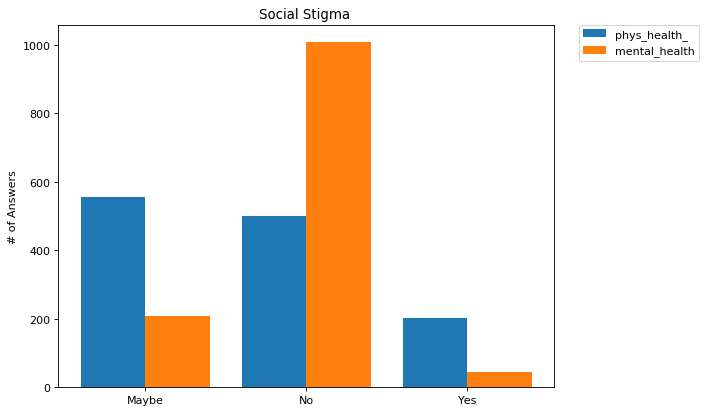

In [507]:
## Stigma. What easely would you bring up on an interview 

X = ['Maybe','No','Yes']
#Y = [1,2,3]
#Z = [2,3,4]
_X = np.arange(len(X))

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.bar(_X - 0.2, hi, 0.4, label='phys_health_')
plt.bar(_X + 0.2, mi, 0.4, label='mental_health')
plt.xticks(_X, X)# set labels manually
plt.ylabel('# of Answers')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Social Stigma ')
plt.show()


In [186]:
#ds = ds.loc[(ds['family_history'] == 'No')]
#ds

In [238]:
ds['family_history'].value_counts()

No     767
Yes    492
Name: family_history, dtype: int64

In [199]:
#PErcentage of people that are or were possible Mental Ill in the companies 

tret_yes_mean = round(ds.loc[ds['treatment'] == 'Yes', 'treatment'].value_counts()/ds['treatment'].count()*100, 2)
tret_no_mean =round(ds.loc[ds['treatment'] == 'No', 'treatment'].value_counts()/ds['treatment'].count()*100, 2)

fam_yes_mean = round(ds.loc[ds['family_history'] == 'Yes', 'family_history'].value_counts()/ds['family_history'].count()*100, 2)
fam_no_mean = round(ds.loc[ds['family_history'] == 'No', 'family_history'].value_counts()/ds['family_history'].count()*100, 2)


In [200]:
plt.pie

<function matplotlib.pyplot.pie(x, explode=None, labels=None, colors=None, autopct=None, pctdistance=0.6, shadow=False, labeldistance=1.1, startangle=None, radius=None, counterclock=True, wedgeprops=None, textprops=None, center=(0, 0), frame=False, rotatelabels=False, hold=None, data=None)>

In [508]:
### Awerness by size of company 


caropt = ds.groupby(['no_employees']).agg({'care_options': 'value_counts'})

#for opt in caropt['care_options']:



values = [2.0,9.5,37.0,200.0,250.0,1000.0]


total_by_siz = [caropt['care_options'][v].sum() for v in values]



#perc = [c_opt[siz][opt] for siz in c_opt for opt in siz]

#caropt['care_options']['1-5']/ total_by_siz[1]

#caropt['care_options']/162

#def percentage():
 #   values = ['1-5','100-500','26-100','500-1000','6-25','More than 1000']
  ##  total_by_siz = [caropt['care_options'][v].sum() for v in values]
    #if caropt.loc['1-5']/total_by_siz[0]

#caropt.loc['1-5']/total_by_siz[0]
values = [2.0,9.5,37.0,200.0,250.0,1000.0]

#total_by_siz = [caropt['care_options'][v].sum() for v in values]

#caropt['care_options']['1-5']/total_by_siz[0]
#caropt['care_options'][1]/total_by_siz[1]
#caropt['care_options'][2]/total_by_siz[2]
#caropt['care_options'][3]/total_by_siz[3]
#caropt['care_options'][4]/total_by_siz[4]
#caropt['care_options'][5]/total_by_siz[5]

#caropt#.loc['care_options']

#caropt['care_options'].loc['1-5'] = caropt['care_options'].loc['1-5']/124



caropt.iloc[0:3] = caropt.iloc[0:3]/total_by_siz[0]
caropt.iloc[3:6] = caropt.iloc[3:6]/total_by_siz[1]
caropt.iloc[6:9] = caropt.iloc[6:9]/total_by_siz[2]
caropt.iloc[9:12] = caropt.iloc[9:12]/total_by_siz[3]
caropt.iloc[12:15] = caropt.iloc[12:15]/total_by_siz[4]
caropt.iloc[15:18] = caropt.iloc[15:18]/total_by_siz[5]


caropt

care_options
no_employees care_options              
2.0          Yes               0.462963
             No                0.364198
             Not sure          0.172840
9.5          No                0.562069
             Yes               0.248276
             Not sure          0.189655
37.0         No                0.404844
             Yes               0.332180
             Not sure          0.262976
200.0        No                0.363636
             Not sure          0.318182
             Yes               0.318182
250.0        No                0.366667
             Yes               0.333333
             Not sure          0.300000
1000.0       Yes               0.443262
             Not sure          0.287234
             No                0.269504

In [509]:
w_prog = ds.groupby(['no_employees']).agg({'wellness_program': 'value_counts'})

values = [2.0,9.5,37.0,200.0,250.0,1000.0]

total_by_siz = [w_prog['wellness_program'][v].sum() for v in values]


w_prog.iloc[0:3] = w_prog.iloc[0:3]/total_by_siz[0]
w_prog.iloc[3:6] = w_prog.iloc[3:6]/total_by_siz[1]
w_prog.iloc[6:9] = w_prog.iloc[6:9]/total_by_siz[2]
w_prog.iloc[9:12] = w_prog.iloc[9:12]/total_by_siz[3]
w_prog.iloc[12:15] = w_prog.iloc[12:15]/total_by_siz[4]
w_prog.iloc[15:18] = w_prog.iloc[15:18]/total_by_siz[5]



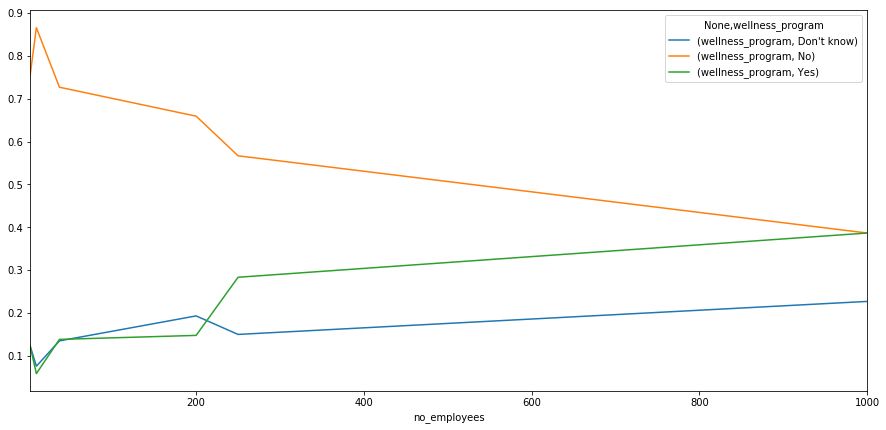

In [511]:
fig, ax = plt.subplots(figsize=(15,7))

w_prog.unstack().plot(ax=ax)
#caropt.unstack().plot(ax=ax)






In [403]:
ds_ill = ds[(ds['family_history'] == 'yes') | (ds['treatment'] == 'Yes')]

In [405]:
ds_ill['family_history']

0        No
3       Yes
6       Yes
8       Yes
10       No
       ... 
1252    Yes
1254     No
1255    Yes
1256    Yes
1258    Yes
Name: family_history, Length: 637, dtype: object

In [428]:
f_his = ds.groupby(ds['family_history']).size()
f_his

family_history
No     767
Yes    492
dtype: int64

In [429]:
treatment = ds.groupby(ds['treatment']).size()
treatment


treatment
No     622
Yes    637
dtype: int64

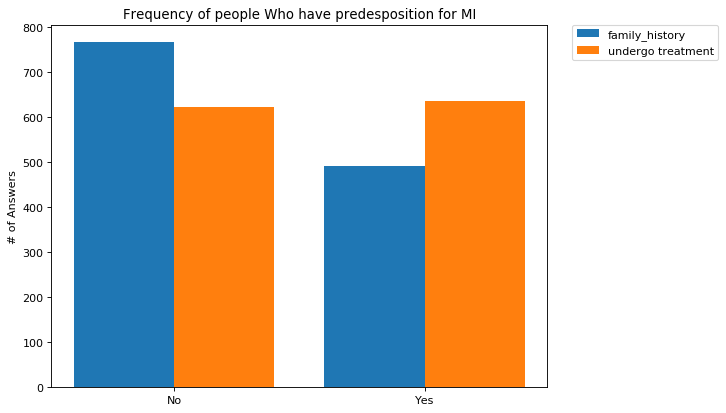

In [516]:
X = ['No','Yes']
#Y = [1,2,3]
#Z = [2,3,4]
_X = np.arange(len(X))

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.bar(_X - 0.2, f_his, 0.4, label='family_history')
plt.bar(_X + 0.2, treatment, 0.4, label='undergo treatment')
plt.xticks(_X, X)# set labels manually
plt.ylabel('# of Answers')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Frequency of people Who have predesposition for MI')
plt.show()

## almost 50 percent of the people have predesposition for 

In [513]:
ds_ill = ds[(ds['family_history'] == 'yes') | (ds['treatment'] == 'Yes')]


ds_ill = ds_ill.drop(columns = ['care_options','Age', 'wellness_program', 'mental_health_interview','phys_health_interview'])
ds_ill

,Timestamp,family_history,treatment,no_employees,benefits,seek_help,anonymity,leave
0,2014-08-27 11:29:31,No,Yes,9.5,Yes,Yes,Yes,Somewhat easy
3,2014-08-27 11:29:46,Yes,Yes,37.0,No,No,No,Somewhat difficult
6,2014-08-27 11:31:50,Yes,Yes,2.0,No,No,No,Somewhat difficult
8,2014-08-27 11:32:39,Yes,Yes,200.0,Yes,No,No,Very difficult
10,2014-08-27 11:32:44,No,Yes,9.5,Don't know,No,Don't know,Don't know
...,...,...,...,...,...,...,...,...
1252,2015-08-20 16:52:09,Yes,Yes,200.0,Yes,No,Yes,Don't know
1254,2015-09-12 11:17:21,No,Yes,37.0,No,No,Don't know,Somewhat easy
1255,2015-09-26 01:07:35,Yes,Yes,37.0,Yes,No,Yes,Somewhat difficult
1256,2015-11-07 12:36:58,Yes,Yes,1000.0,Yes,No,Don't know,Somewhat difficult


In [445]:
ds_ill['leave'].value_counts()

Don't know            254
Somewhat easy         131
Very easy             103
Somewhat difficult     82
Very difficult         67
Name: leave, dtype: int64

In [447]:
ds_ill['seek_help'].value_counts()

No            323
Don't know    166
Yes           148
Name: seek_help, dtype: int64

In [448]:
ds_ill['benefits'].value_counts()

Yes           305
No            181
Don't know    151
Name: benefits, dtype: int64

In [450]:
ds_ill['anonymity'].value_counts()

Don't know    371
Yes           228
No             38
Name: anonymity, dtype: int64

In [455]:
anon = ds.groupby(ds['anonymity']).size()
ben = ds.groupby(ds['benefits']).size()
seek = ds.groupby(ds['seek_help']).size()

seek


seek_help
Don't know    363
No            646
Yes           250
dtype: int64

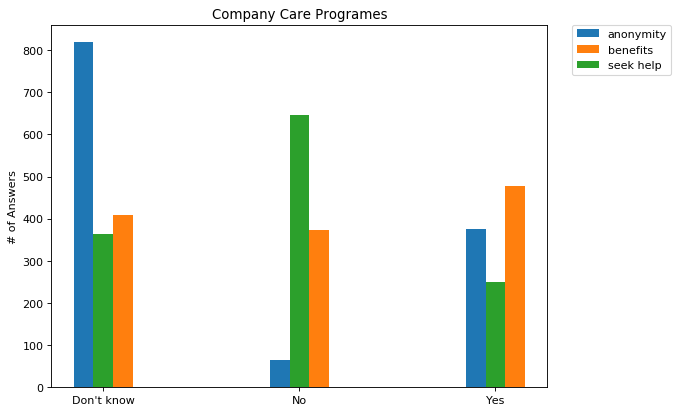

In [523]:
## Stigma. What easely would you bring up on an interview 

X = ["Don't know",'No','Yes']

_X = np.arange(len(X))

figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')


plt.bar(_X - 0.1, anon, 0.1, label='anonymity')
plt.bar(_X + 0.1, ben, 0.1, label='benefits')
plt.bar(_X, seek, 0.1, label='seek help')


plt.xticks(_X, X)# set labels manually
plt.ylabel('# of Answers')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.title('Company Care Programes')
plt.show()

##Companyes 

In [527]:
gg = ds.groupby(['no_employees']).agg({'benefits': 'value_counts','seek_help': 'value_counts', 'anonymity':'value_counts' })



benefits  seek_help  anonymity
2.0    Don't know        32         24         83
       No               111        117         16
       Yes               19         21         63
9.5    Don't know        98         64        198
       No               132        201         22
       Yes               60         25         70
37.0   Don't know       114         85        202
       No                74        171         12
       Yes              101         33         75
200.0  Don't know        65         61        124
       No                32         84          7
       Yes               79         31         45
250.0  Don't know        21         25         40
       No                 4         18          1
       Yes               35         17         19
1000.0 Don't know        78        104        172
       No                21         55          7
       Yes              183        123        103

In [539]:
gg.iloc[0:3] = gg.iloc[0:3]/total_by_siz[0]
gg.iloc[3:6] = gg.iloc[3:6]/total_by_siz[1]
gg.iloc[6:9] = gg.iloc[6:9]/total_by_siz[2]
gg.iloc[9:12] = gg.iloc[9:12]/total_by_siz[3]
gg.iloc[12:15] = gg.iloc[12:15]/total_by_siz[4]
gg.iloc[15:18] = gg.iloc[15:18]/total_by_siz[5]



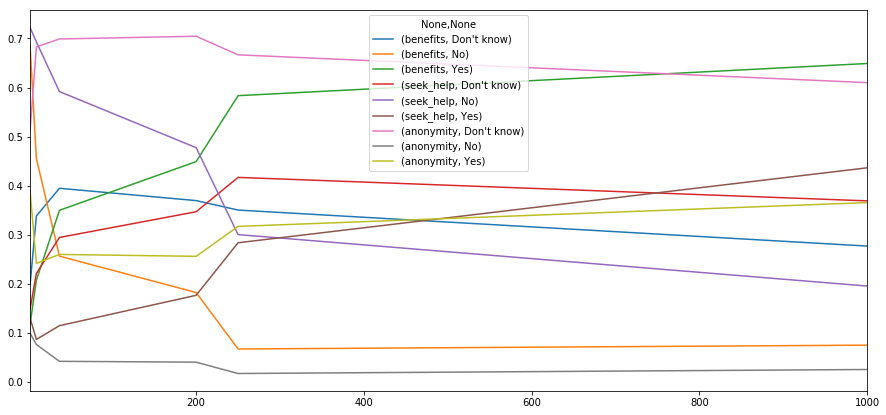

In [540]:


fig, ax = plt.subplots(figsize=(15,7))

gg.unstack().plot(ax=ax)

